In [1]:
import pandas as pd
import os
import sys
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.abspath(parent_path))
from constants import HAWAJEZ,STATUS_WORDS,STATUS
from fuzzywuzzy import fuzz
from utils.helpers import is_talking_about_it,is_it_match_status
import concurrent.futures


c:\Users\nasser\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
data = pd.read_csv('../data/more_data_v4.csv')

In [3]:
data.shape

(372085, 1)

In [4]:
data =data[['full_text']]

In [5]:
data.shape

(372085, 1)

In [6]:
data.fillna('',inplace=True)

In [7]:
for hajez in HAWAJEZ:
    data[hajez]  = data['full_text'].apply(lambda x: is_talking_about_it(hajez, x))
    print(hajez)

حوارة
دير شرف
صرة
دوار سلمان
بيت فوريك
شافي شمرون
الحمرا
جيت
عراق بورين
يتسهار
الفندق
عين يبرود
المربعه
بيتا
بيت ايل
صره
عينابوس
عين سينا
قرني شمرون
عورتا
الطنيب
كدوميم 
العيزرية
حومش
زعترة
عوفرا
الكونتينر
عناتا
حزما
الكنتينر
قلنديا
جبع
تل
دي سي او
no_hajez


In [8]:
data.shape

(372085, 36)

In [9]:
# put 1 if all the hawajez are 0 or there sums is >1
data['no_hajez'] = data[HAWAJEZ[:-1]].apply(lambda x: 1 if x.sum() == 0 or x.sum() > 1 else 0, axis=1)
# set all the hawajez to 0 if no_hajez is 1
data[HAWAJEZ[:-1]] = data[HAWAJEZ[:-1]].where(data['no_hajez'] == 0, 0)

In [11]:
# # rmove any row that the sum of all hawajez is not 1
data[data[HAWAJEZ[:-1]].sum(axis=1) > 1]

,full_text,حوارة,دير شرف,صرة,دوار سلمان,بيت فوريك,شافي شمرون,الحمرا,جيت,عراق بورين,...,عوفرا,الكونتينر,عناتا,حزما,الكنتينر,قلنديا,جبع,تل,دي سي او,no_hajez


In [12]:
data.shape

(372085, 36)

In [13]:
# display all the columns
pd.set_option('display.max_columns', None)
data

,full_text,حوارة,دير شرف,صرة,دوار سلمان,بيت فوريك,شافي شمرون,الحمرا,جيت,عراق بورين,يتسهار,الفندق,عين يبرود,المربعه,بيتا,بيت ايل,صره,عينابوس,عين سينا,قرني شمرون,عورتا,الطنيب,كدوميم,العيزرية,حومش,زعترة,عوفرا,الكونتينر,عناتا,حزما,الكنتينر,قلنديا,جبع,تل,دي سي او,no_hajez
0,دوار يكدوميم حركه سير قويه للجهتين,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,حاجز حوارة سالك للجهتين,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,وبيتا نظيف,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,مخصوم حواره مغلقة,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,وno_hajez اذا مسكره,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372080,اللي نازل من يتسهار بتجاه مفرق حوارة فاضي,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
372081,ده شرف فاتحه ولا مسكره|||اذا طالع من نابلس مسك...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372082,كيف حزما|||حركه سير قويه ماشيه للجنوب,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
372083,مخصوم جبع جيش؟|||جيش,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
for status in STATUS_WORDS[:-1]:
    # ket the key crossponding to the value status
    
    key = [k for k, v in STATUS.items() if v == status][0]
    data[status]  = data['full_text'].apply(lambda x: is_it_match_status(key, x))
    print(f"{status} is done")

مفتوح is done
مغلق is done
ازمة is done
حذر is done


In [15]:
# put 1 if all the hawajez are 0 or there sums is >1
data['no_status'] = data[STATUS_WORDS[:-1]].apply(lambda x: 1 if x.sum() == 0 or x.sum() > 1 else 0, axis=1)
# set all the hawajez to 0 if no_hajez is 1
data[STATUS_WORDS[:-1]] = data[STATUS_WORDS[:-1]].where(data['no_status'] == 0, 0)

In [18]:
data[data[STATUS_WORDS[:-1]].sum(axis=1) >1]

,full_text,حوارة,دير شرف,صرة,دوار سلمان,بيت فوريك,شافي شمرون,الحمرا,جيت,عراق بورين,يتسهار,الفندق,عين يبرود,المربعه,بيتا,بيت ايل,صره,عينابوس,عين سينا,قرني شمرون,عورتا,الطنيب,كدوميم,العيزرية,حومش,زعترة,عوفرا,الكونتينر,عناتا,حزما,الكنتينر,قلنديا,جبع,تل,دي سي او,no_hajez,مفتوح,مغلق,ازمة,حذر,no_status


In [153]:

# data = data[data[STATUS_WORDS].sum(axis=1) != 0]


<Axes: title={'center': 'Status Words Distribution'}>

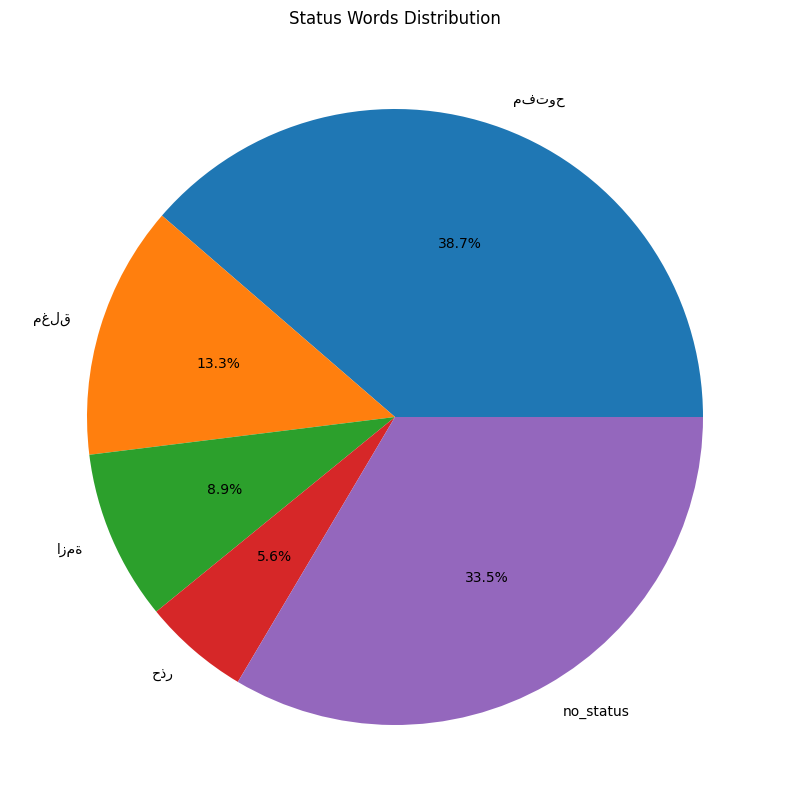

In [19]:
# get the sum for each column of status words and draw a pie chart
data[STATUS_WORDS].sum().plot.pie(figsize=(10, 10), autopct='%1.1f%%', title='Status Words Distribution')

<Axes: title={'center': 'Hajez Distribution'}>

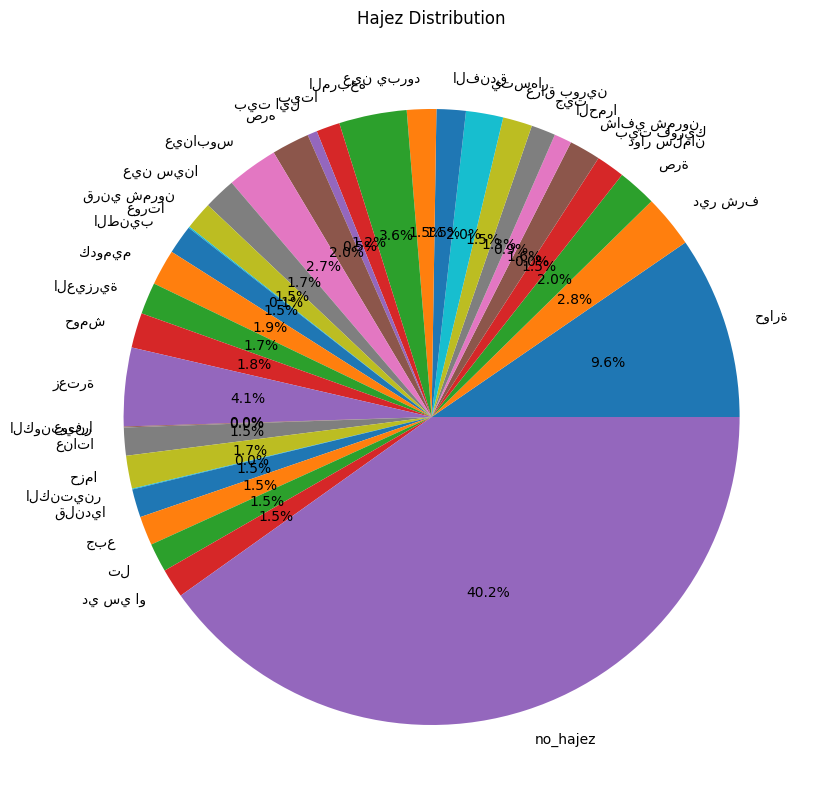

In [20]:
# draw a pie chart for each hajez
data[HAWAJEZ].sum().plot.pie(figsize=(10, 10), autopct='%1.1f%%', title='Hajez Distribution')


In [156]:
# # get the number of rows contain more than one status
# data[data[STATUS_WORDS].sum(axis=1) > 1]
# # remove the rows contain more than one status
# data = data[data[STATUS_WORDS].sum(axis=1) == 1]

In [157]:

# # drop them
# data = data[data[HAWAJEZ].sum(axis=1) != 0]


In [21]:
data.shape

(372085, 41)

In [30]:
row = data.iloc[0].copy()
row['full_text'] = ''
row['no_hajez'] = 1
row['no_status'] = 1
row[HAWAJEZ[:-1]] = 0
row[STATUS_WORDS[:-1]] = 0
# add the row to the data frame
data = data.append(row, ignore_index=True)

C:\Users\nasser\AppData\Local\Temp\ipykernel_25456\487941585.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)


In [36]:
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)
data = data.append(row, ignore_index=True)

data = data.append(row, ignore_index=True)

C:\Users\nasser\AppData\Local\Temp\ipykernel_25456\836254452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\nasser\AppData\Local\Temp\ipykernel_25456\836254452.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\nasser\AppData\Local\Temp\ipykernel_25456\836254452.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\nasser\AppData\Local\Temp\ipykernel_25456\836254452.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(row, ignore_index=True)
C:\Users\nasser\AppD

In [ ]:
# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

In [37]:
data.to_csv('../data/labeld_data_huge_v4.csv', index=False)